## 2) El sistema de Lorenz

> Considere el sistema de Lorenz (Lorenz 1963):
> $$ \begin{aligned}
\dot{x} &= σ(y − x) \\
\dot{y} &= ρx − y − xz \\
\dot{z} &= xy − βz \\
\end{aligned} $$
> donde $x$, $y$ y $z$ son funciones del tiempo
y $β=8/3$, $σ=10$ y $ρ$ parámetros del sistema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.rc("figure", dpi=100)


def lorenz(*, sigma, rho, beta):
    def lorenz_rhs(t, y):
        dy = np.empty_like(y)
        x, y, z = y
        dy[0] = sigma * (y - x)
        dy[1] = rho * x - y - x * z
        dy[2] = x * y - beta * z
        return dy

    return lorenz_rhs


solver_kwargs = dict(method="RK45", atol=1e-6, rtol=1e-6)

In [2]:
def plot_time_trajectories(fig, sol):
    axes = fig.axes
    if len(axes) == 0:
        axes = fig.subplots(3, sharex=True)
    
    for ax, y, label in zip(axes, sol.y, "xyz"):
        ax.plot(sol.t, y)
        ax.set(ylabel=label)
    ax.set(xlabel="Tiempo")
    fig.align_ylabels()

def plot_xz(fig, sol, label="$W_0$"):
    if len(fig.axes) == 0:
        ax = fig.subplots()
    else:
        ax = fig.axes[0]

    ax.plot(sol.y[1], sol.y[2])
    ax.scatter(sol.y[1][0], sol.y[2][0], label=label)
    ax.set(xlabel="y", ylabel="z")
    ax.legend()

def plot_3d(fig, sol):
    if len(fig.axes) == 0:
        ax = fig.add_subplot(projection='3d')
    else:
        ax = fig.axes[0]

    ax.plot(*sol.y)
    ax.set(xlabel="x", ylabel="y", zlabel="z")

def plot(fig, sol):
    figs = fig.subfigs
    if len(figs) == 0:
        figs = fig.subfigures(ncols=3)
    
    plot_time_trajectories(figs[0], sol)
    plot_xz(figs[1], sol)
    plot_3d(figs[2], sol)

### a)
> Resuelva numéricamente el sistema de Lorenz
hasta $t = 50$
usando la condición inicial $W_0 = (x_0, y_0, z_0) = (0, 0.5, 0.5)$,
y $ρ = 2$.
Grafique $y(t)$ y $z(t)$
y la trayectoria en el espacio de fase proyectada en el plano
$y − z$ (es decir $y(z)$).
¿A qué dinámica corresponde esta solución?
Utilice un método con paso de tiempo variable:
`scipy.integrate.ode(f).set_integrator(‘dopri5’)` en SciPy.

Esta condición inicial tiende a un punto fijo en el espacio de fases.

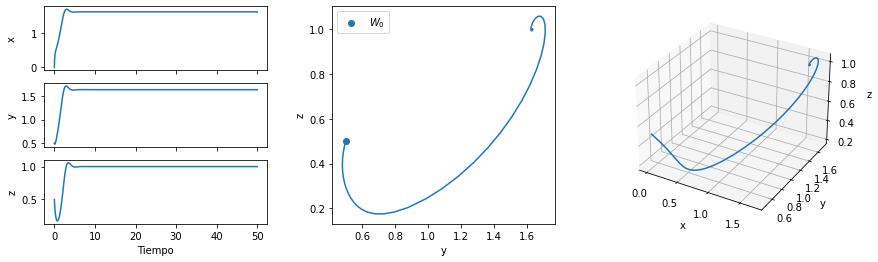

In [14]:
from re import M


sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=2),
    t_span=(0, 50),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

### b)
> Para la misma condición inicial,
utilice
(i) $ρ = 10$ y
(ii) $ρ = 24$.
Grafique $y(t)$ y $z(t)$,
$y(z)$,
y la trayectoria en el espacio de fases tridimensional $(x, y, z)$.
¿Cómo cambian las soluciones?

Las soluciones también tienden a un punto fijo,
pero las trayectorias oscilan al acercarse a este.

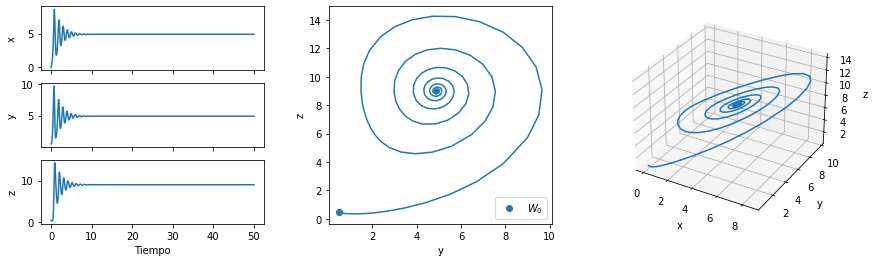

In [4]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=10),
    t_span=(0, 50),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

En cambio,
para $\rho = 24$,
la solución parece tender a un ciclo límite,
donde las 3 variables oscilan alrededor de un punto del espacio de fase.

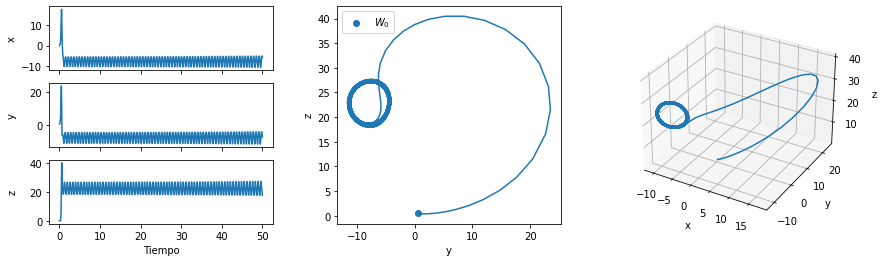

In [5]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=24),
    t_span=(0, 50),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

### c)
> Para $ρ=25$ grafique nuevamente $y(t)$ y $z(t)$, $y(z)$, y la trayectoria en el espacio de fases tridimensional.
Compare las soluciones numéricas $ρ=24$ y $ρ=25$.
¿La solución con $ρ=24$ va a continuar igual para todo tiempo? ¿Por qué?

A diferencia del caso anterior,
para $\rho = 25$,
la solución muestra aspectos de un sistema caótico.
La solución oscila alrededor de dos "ciclos límite",
saltando entre uno y otro de manera "impredecible".

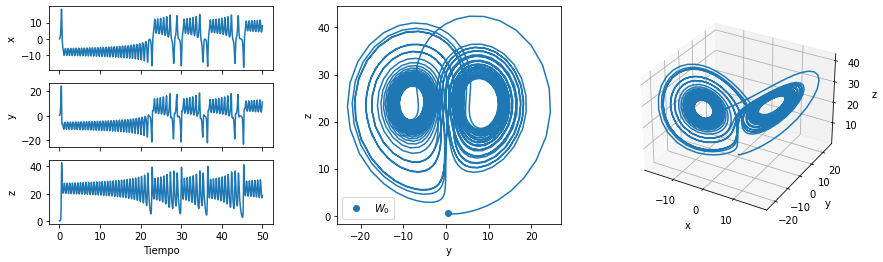

In [6]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=25),
    t_span=(0, 50),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

Si evolucionamos el caso de $\rho = 24$ para tiempos mayores,
se observa que también tiene comportamiento caótico.

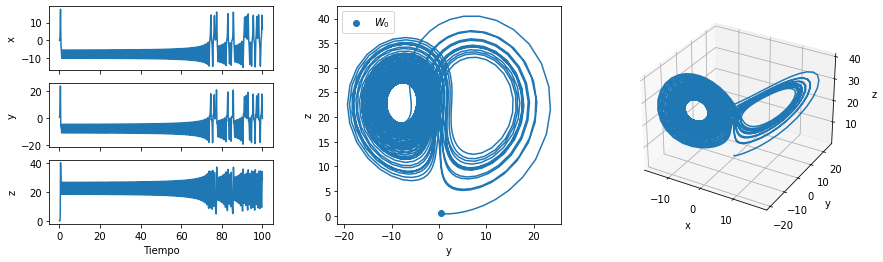

In [7]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=24),
    t_span=(0, 100),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

### d)
> Para $ρ=30$ muestre la evolución temporal de $y$
para las siguientes condiciones iniciales:
(i) $W_0 = (x_0, y_0, z_0) = (0, 0.5, 0.5)$ y
(ii) $W_0 = (x_0, y_0, z_0) = (0, 0.5, 0.50001)$.
¿Qué observa?

Las dos soluciones se mueven juntas en el espacio de fases para tiempos cortos.
Incluso para los saltos entre los dos atractores.
Pero, a partir de cierto tiempo, se separan,
y la dinámica de una solución no nos informa nada sobre la dinámica de la otra.

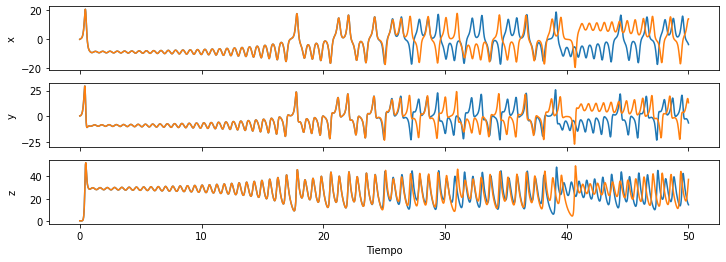

In [8]:
fig = plt.figure(figsize=(12, 4))

for z0 in (0.5, 0.50001):
    sol = solve_ivp(
        lorenz(sigma=10, beta=8 / 3, rho=30),
        t_span=(0, 50),
        y0=(0, 0.5, z0),
        **solver_kwargs,
    )
    plot_time_trajectories(fig, sol)

In [21]:
def sol(z0, *, t):
    return solve_ivp(
        lorenz(sigma=10, beta=8 / 3, rho=30),
        t_span=(t[0], t[-1]),
        t_eval=t,
        y0=(0, 0.5, z0),
        **solver_kwargs,
    ).y

delta_z0 = np.logspace(-9, -3, 6)

t = np.linspace(0, 50, 1_000)
sol_0 = sol(0.5, t=t)
sol_1 = sol(0.5 + delta_z0[0], t=t)

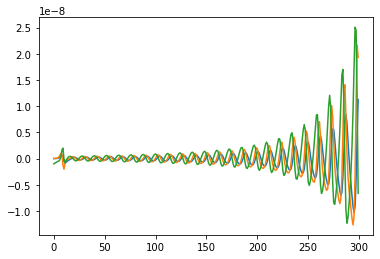

In [27]:
diff = (sol_0 - sol_1)

plt.plot(diff.T[:300])